# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Sara Calle Muñoz
*Métodos computacionales 2025-I*

---

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline, CubicHermiteSpline, lagrange

In [2]:
#definimos las variables
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo

t = 10 # segundos

In [3]:
#para el spline cúbico
pos_spline = CubicSpline(tiempos, distancias)
vel_spline = pos_spline.derivative()

#para Hermite
pos_hermite = CubicHermiteSpline(tiempos, distancias, velocidades)
vel_hermite = pos_hermite.derivative()

#resultados
print(f"Posición con spline en t={t}: {pos_spline(t):.2f} m")
print(f"Velocidad con spline en t={t}: {vel_spline(t):.2f} m/s")

print(f"Posición con Hermite en t={t}: {pos_hermite(t):.2f} m")
print(f"Velocidad con Hermite en t={t}: {vel_hermite(t):.2f} m/s")

Posición con spline en t=10: 778.42 m
Velocidad con spline en t=10: 75.82 m/s
Posición con Hermite en t=10: 771.96 m
Velocidad con Hermite en t=10: 74.64 m/s



Velocidad máxima con spline: 80.27 m/s
Velocidad máxima con Hermite: 82.00 m/s


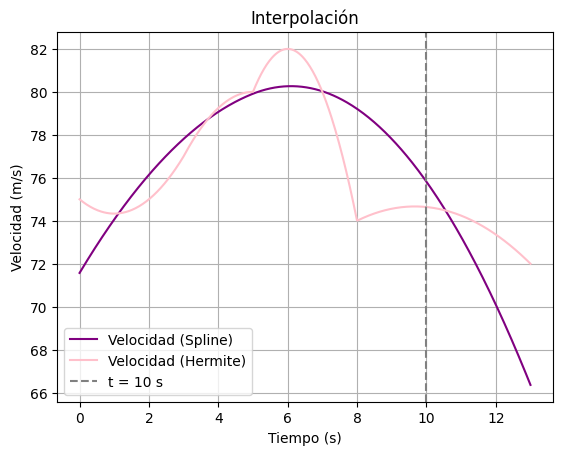

In [4]:
# tiempos para evaluar, entre 0 y 13 s
t_vals = np.linspace(0, 13, 500)

#evaluaamos las velocidades en esos tiempos
velocidades_spline = vel_spline(t_vals)
velocidades_hermite = vel_hermite(t_vals)

#encontramos la velocidad máxima
vel_max_spline = np.max(velocidades_spline)
vel_max_hermite = np.max(velocidades_hermite)

#resultados
print(f"\nVelocidad máxima con spline: {vel_max_spline:.2f} m/s")
print(f"Velocidad máxima con Hermite: {vel_max_hermite:.2f} m/s")

#gráficamos
plt.plot(t_vals, velocidades_spline, label="Velocidad (Spline)", color="purple")
plt.plot(t_vals, velocidades_hermite, label="Velocidad (Hermite)", color="pink")
plt.axvline(x=t, color="gray", linestyle="--", label="t = 10 s")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Interpolación")
plt.legend()
plt.grid(True)
plt.show()

# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

g(5000 m) = 9.7947 m/s²
g(42000 m) = 9.6819 m/s²
g(90000 m) = 9.5384 m/s²


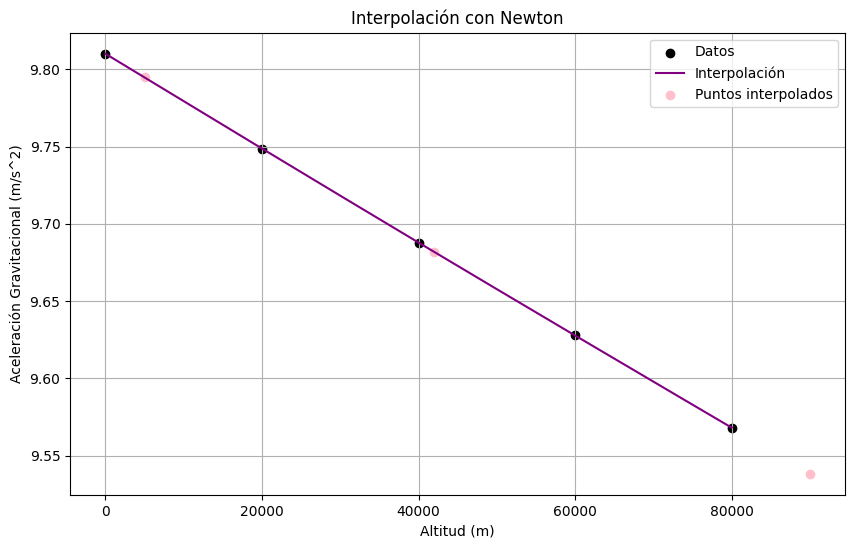

In [5]:
#datos de altitud (en metros) y aceleración gravitacional (en m/s^2)
y = np.array([0, 20000, 40000, 60000, 80000])
g = np.array([9.8100, 9.7487, 9.6879, 9.6278, 9.5682])

#función de interpolación de Newton (Tomada de las notas de clase)
def newton_interpolation(x_data, y_data, x_interp):
    n = len(x_data)
    F = np.zeros((n, n))
    F[:,0] = y_data
    for j in range(1, n):
        for i in range(n - j):
            F[i,j] = (F[i+1,j-1] - F[i,j-1]) / (x_data[i+j] - x_data[i])
    result = F[0,0]
    product = 1.0
    for j in range(1, n):
        product *= (x_interp - x_data[j-1])
        result += F[0,j] * product
    return result

#puntos para interpolar
altitudes_interp = [5000, 42000, 90000]
for alt in altitudes_interp:
    g_interp = newton_interpolation(y, g, alt)
    print(f"g({alt} m) = {g_interp:.4f} m/s²")

#para gráficar
x_vals = np.linspace(0, 80000, 1000)
g_vals = [newton_interpolation(y, g, x) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.scatter(y, g, color='black', label='Datos')
plt.plot(x_vals, g_vals, color='purple', label='Interpolación')
plt.scatter(altitudes_interp, [newton_interpolation(y, g, alt) for alt in altitudes_interp], color='pink', label='Puntos interpolados')
plt.xlabel('Altitud (m)')
plt.ylabel('Aceleración Gravitacional (m/s^2)')
plt.title('Interpolación con Newton')
plt.legend()
plt.grid(True)
plt.show()


# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



ρ(250 K) = 1.3975 kg/m^3
ρ(800 K) = 0.4964 kg/m^3
ρ(3000 K) = 1561.1659 kg/m^3


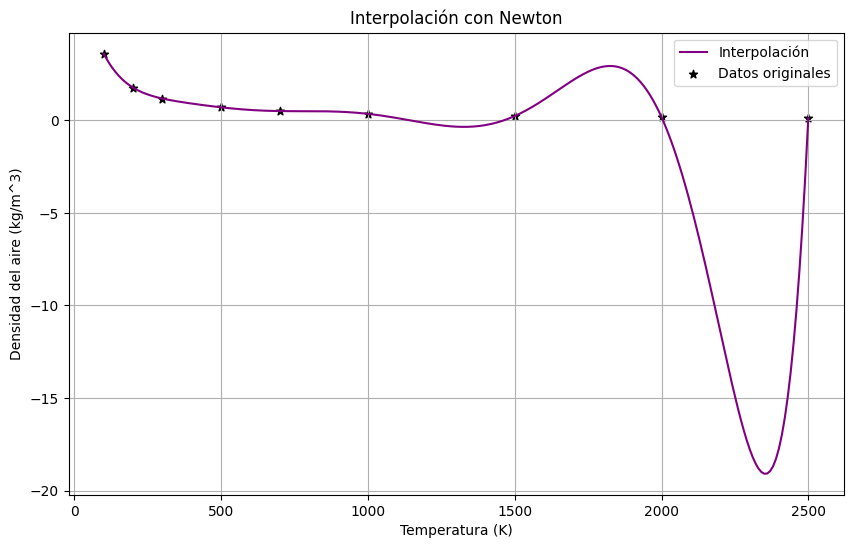

In [6]:
#datos (temperatura en K y densidad del aire en kg/m^3)
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500])
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394])

#interpolación para los valores dados
temps_objetivo = [250, 800, 3000]
for T_i in temps_objetivo:
    rho_i = newton_interpolation(T, rho, T_i)
    print(f"ρ({T_i} K) = {rho_i:.4f} kg/m^3")

#interpolación de 100 K a 2500 K cada 10 K
T_interp = np.arange(100, 2501, 10)
rho_interp = [newton_interpolation(T, rho, t) for t in T_interp]

#gráficamos
plt.figure(figsize=(10,6))
plt.plot(T_interp, rho_interp, label='Interpolación', color='purple')
plt.scatter(T, rho, color='black', marker='*', label='Datos originales')
plt.xlabel('Temperatura (K)')
plt.ylabel('Densidad del aire (kg/m^3)')
plt.title('Interpolación con Newton')
plt.grid(True)
plt.legend()
plt.show()

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

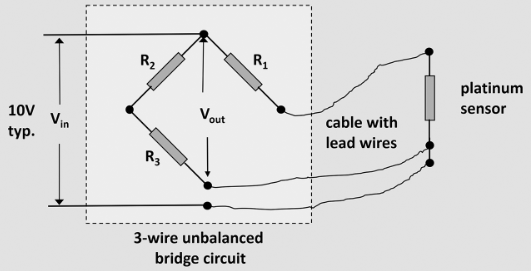




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

In [7]:
# Datos
resistencia = np.array([100, 115, 130, 145, 160, 175])  # en ohmios
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # en voltios

#interpolación
interp_voltaje = interp1d(resistencia, voltaje)  #V en función de R
voltaje_139 = interp_voltaje(139.27) #para estimar el voltaje cuando la resistencia es 139.27 Ω
print(f"Voltaje estimado cuando la resistencia es 139.27 Ω: {voltaje_139:.4f} V")

interp_resistencia = interp1d(voltaje, resistencia)  #R en función de V
resistencia_0V = interp_resistencia(0) #para estimar la resistencia cuando el voltaje es 0
print(f"Resistencia estimada cuando el voltaje es 0 V: {resistencia_0V:.2f} Ω")

Voltaje estimado cuando la resistencia es 139.27 Ω: -0.3665 V
Resistencia estimada cuando el voltaje es 0 V: 120.21 Ω


# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

In [9]:
# Datos
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

#índice de refracción objetivo
n_objetivo = 1.520

#interpolación
interp_cubica = CubicSpline(indice_refraccion, lambda_angstrom)

#estimamos la longitud de onda
lambda_estimada = interp_cubica(n_objetivo)

print(f"La longitud de onda estimada para un índice de refracción de {n_objetivo} es {lambda_estimada:.2f} Å")

La longitud de onda estimada para un índice de refracción de 1.52 es 4482.27 Å
